# Student Project: Factors That Contribute to Student Grades
#### By: Diego Sanchez and Jyrel Mendoza
---

 <img src='http://blog.csba.org/wp-content/uploads/2017/06/undocumentedstudents.jpg' width ="600" align = "center"/>
 

## About this project:

In our final project, we are seeking to discover why many students are receiving low grades. This is a problem prevalent across the world, and is a detriment towards the future generation. In order to find probable causes behind low grades, we have decided to collect a dataset that contains a multitude of factors regarding multiple aspects of students' life, alongside their final grades. Factors among the dataset include of familial status, current country occupation, class participation, interest in school, and much more (add more later). We have set out to figure out what factors contribute to a student's grades, and whether or not said mentioned factors have a negative or positive influence on student grades. We have utilized Python to find connections between the given information, and also to create data visualizaiotions to better interpret the data.

---

## Importing Necessary Libraries, Modules, and the dataframe

Python alone is a simple programming language that can achieve many things, but not everything. Therefore, we must import the necessary Libraries and Modules to enhance the capabilities of our program.

**What are Libraries?**

Libraries enable users of programming languages, developers, and other researchers to reuse collections of logically related code.

***What are Modules?***

Modules are logical groups of functionality that programmers can import in order to reuse their code or set of statements.

In this project we will be importing the following:


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [23]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## Reconfiguring the data

After creating a dataframe with the pandas library, you are able to edit the dataframe to align with the goals of the project.


Here, we have modified some of the columns with categorical data and converted it to numerical values to more shorten some aspects of our code:

In [7]:
df['Class'] = df['Class'].map({'H':3, 'M':2, 'L':1})

In [9]:
df['StageID'] = df['StageID'].map({'lowerlevel':1, 'MiddleSchool':2, 'HighSchool':3})

In [10]:
df.drop('SectionID', axis=1, inplace=True)

In [13]:
df1 = df[ df['Class']==1 ]

In [14]:
df2 = df[ df['Class']==2 ]

In [15]:
df3 = df[ df['Class']==3 ]

In [11]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,1,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,1,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,1,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,1
3,M,KW,KuwaIT,1,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,1
4,M,KW,KuwaIT,1,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,2,G-08,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,1
476,F,Jordan,Jordan,2,G-08,Geology,F,Father,50,77,14,28,No,Bad,Under-7,2
477,F,Jordan,Jordan,2,G-08,Geology,S,Father,55,74,25,29,No,Bad,Under-7,2
478,F,Jordan,Jordan,2,G-08,History,F,Father,30,17,14,57,No,Bad,Above-7,1


---

# And Now, Visualizing the Data

## How does class participation affect a student's performance?

<img src='https://img.freepik.com/premium-vector/silhouette-classroom-with-teacher-students-vector-illustration_650065-257.jpg?w=360' width = "550"/>

From our dataset, we collected the data from the columns "Discussion", which presents how many times a student participated in class discussion, and "Raised Hands", which entails the amount of times a student raised their hand in a semester. Both data types relating to a student's participation in class

With this data, we collected and separted the participation data into their respective groups: the high grade group, the medium grade group, and the low grade group

### What about student absences?


Student absences vary among students.


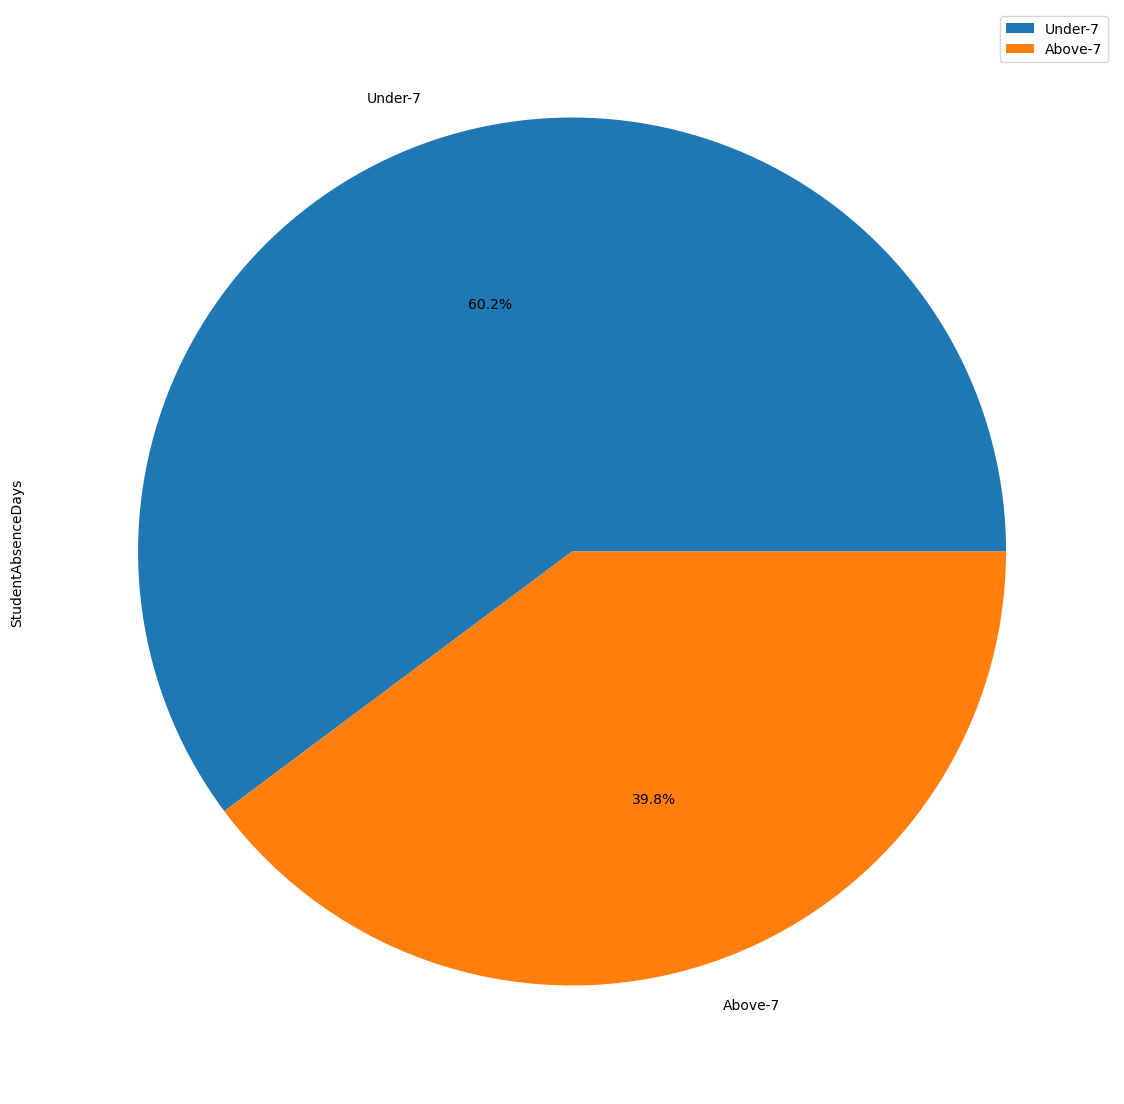

In [19]:
df["StudentAbsenceDays"].value_counts().head(479).plot(kind = 'pie', autopct='%1.1f%%',
                                                     figsize=(14, 18), startangle=0).legend();

Based on the pie chart above, nearly 40% of students have been absent more than 7 times during a semester. With this in mind, we need to figure whether or not student absences contribute to decreased performance

Once again, utilizing matplotlib, we can create a stacked bar chart to demonstrate the differing absence levels among the three grade groups (low, medium, and high)

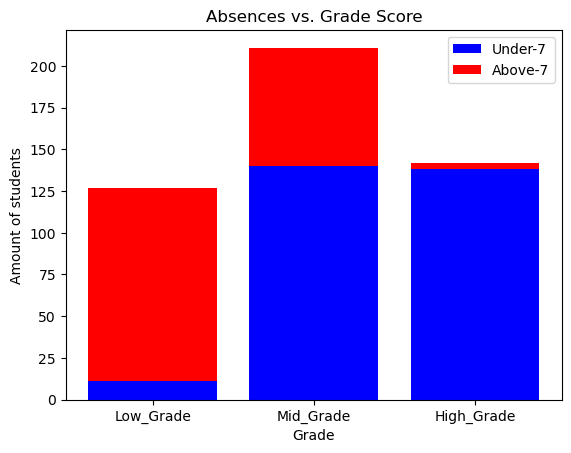

In [12]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ['Low_Grade', 'Mid_Grade', 'High_Grade']
y1 = np.array([11, 140, 138])
y2 = np.array([116, 71, 4])

# plot bars in stack manner
plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.xlabel("Grade")
plt.ylabel("Amount of students")
plt.legend(["Under-7", "Above-7"])
plt.title("Absences vs. Grade Score")
plt.show()

From the stacked bar graph, we can see that students with low grades are most likely to have more than 7 absences, students with moderate grades have a drastically lessened chance to have more than 7 absences, and students with high grades have the least probability of having more than 7 absences. Therefore, less absences from a student have a great chance of increasing their performance in school.

## Correlations between data

Another important thing we noticed after running the data was that multiple factors had a connection or high impact to the overall grade score in their respective class. Some of the factors we took into account were *"raised hands," "Visited Resources," "Announcements View," "Discussion," "Parent(s) involvement," and "Student Absence Days."*

After analyzing the data we run *df.corr()* to assure a connection to multiple data regarding the grade score outcome. We came to conclusion the higher the student involved in the previously mentioned factors the most likely they will have a higher score than those who had little participation in their classes. Each factor had a range of strong postive correlation to a **51% to 69%** approximately in their respective factors.


## Pair Plot

The pair plots below help visualize the correlations

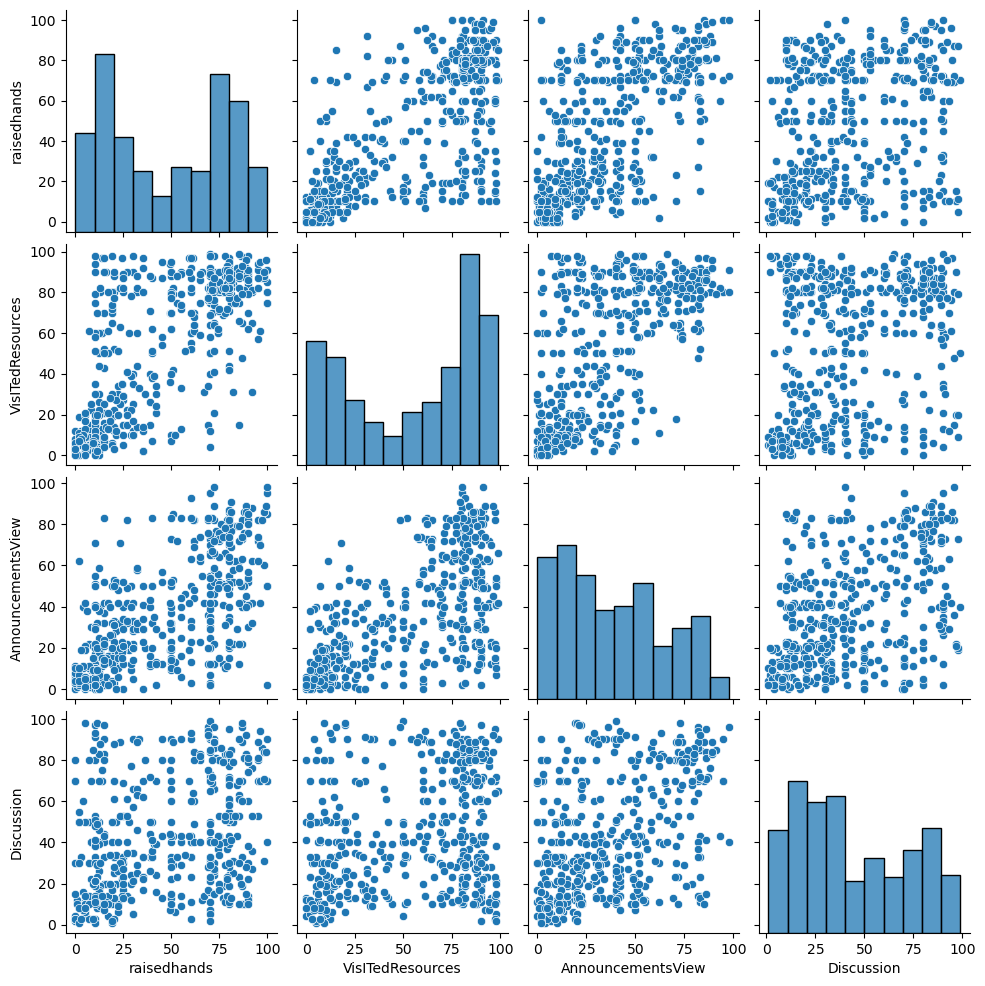

In [24]:
sns.pairplot(df)

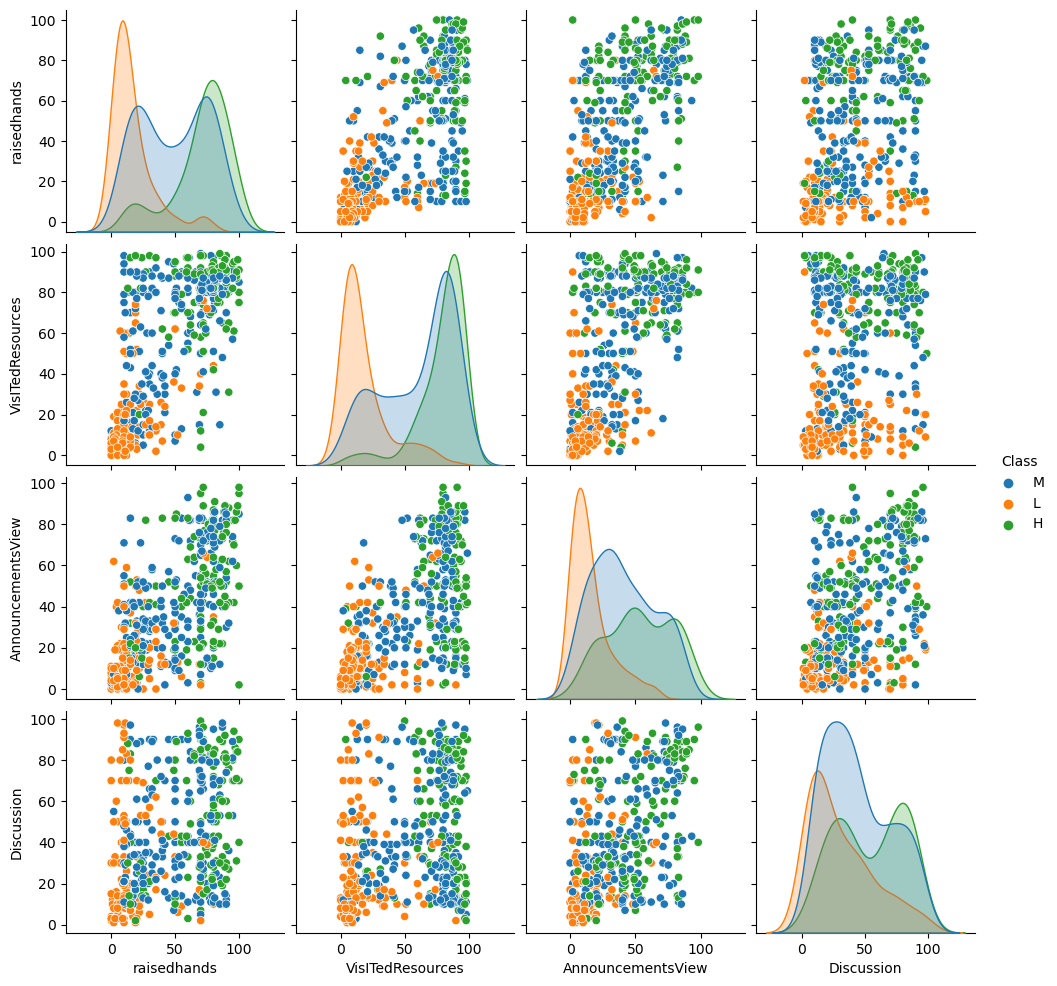

In [49]:
sns.pairplot(df, hue= 'Class')

From the pairgrid, we are able to understand that high grade students have more involvement with their class.

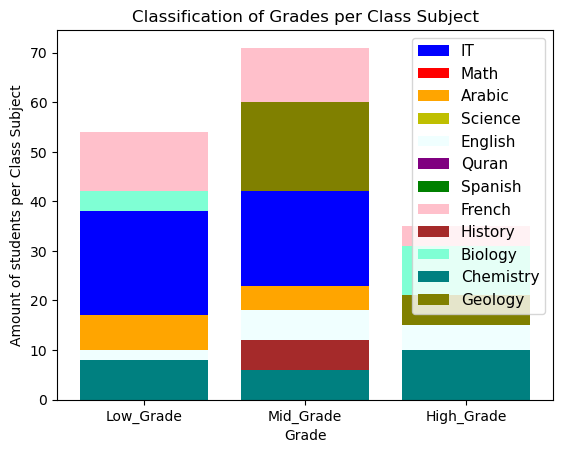

In [20]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ['Low_Grade', 'Mid_Grade', 'High_Grade']
y1 = np.array([38, 42, 15])
y2 = np.array([7, 8, 6])
y3 = np.array([17, 23, 19])
y4 = np.array([10, 25, 16])
y5 = np.array([10, 18, 17])
y6 = np.array([6, 8, 8])
y7 = np.array([8, 12, 5])
y8 = np.array([16, 29, 20])
y9 = np.array([3, 12, 4])
y10 = np.array([4, 10, 16])
y11 = np.array([8, 6, 10])
y12 = np.array([0, 18, 6])


# plot bars in stack manner
plt.bar(x, y1, color='blue')
plt.bar(x, y2, bottom=y1, color='r')
plt.bar(x, y3, color='orange')
plt.bar(x, y4, bottom=y1, color='y')
plt.bar(x, y5, color='azure')
plt.bar(x, y6, bottom=y1, color='purple')
plt.bar(x, y7, color='green')
plt.bar(x, y8, bottom=y1, color='pink')
plt.bar(x, y9, color='brown')
plt.bar(x, y10, bottom=y1, color='aquamarine')
plt.bar(x, y11, color='teal')
plt.bar(x, y12, bottom=y1, color='olive')
plt.xlabel("Grade")
plt.ylabel("Amount of students per Class Subject")
plt.legend(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'], fontsize="11", loc= "upper right")
plt.title("Classification of Grades per Class Subject")
plt.show()
plt.rcParams["figure.figsize"] = (15, 10)

Interestingly, there is also a correlation between a student's specific class and their received grade for that class.

---

Below is a dataframe of the correlations between relevant factors.

In [21]:
df.corr()

/var/folders/hx/jh3h3x6947l28mdc8rx_98gh0000gn/T/ipykernel_38357/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,StageID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
StageID,1.000000,0.172751,0.068621,0.163666,0.161406,0.083997
raisedhands,0.172751,1.000000,0.691572,0.643918,0.339386,0.646298
VisITedResources,0.068621,0.691572,1.000000,0.594500,0.243292,0.677094
AnnouncementsView,0.163666,0.643918,0.594500,1.000000,0.417290,0.527370
Discussion,0.161406,0.339386,0.243292,0.417290,1.000000,0.308183
Class,0.083997,0.646298,0.677094,0.527370,0.308183,1.000000


## Heatmap

The heatmap is created to better visualize the correlations

/var/folders/hx/jh3h3x6947l28mdc8rx_98gh0000gn/T/ipykernel_38357/1550773711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", center=0.0)


<Axes: >

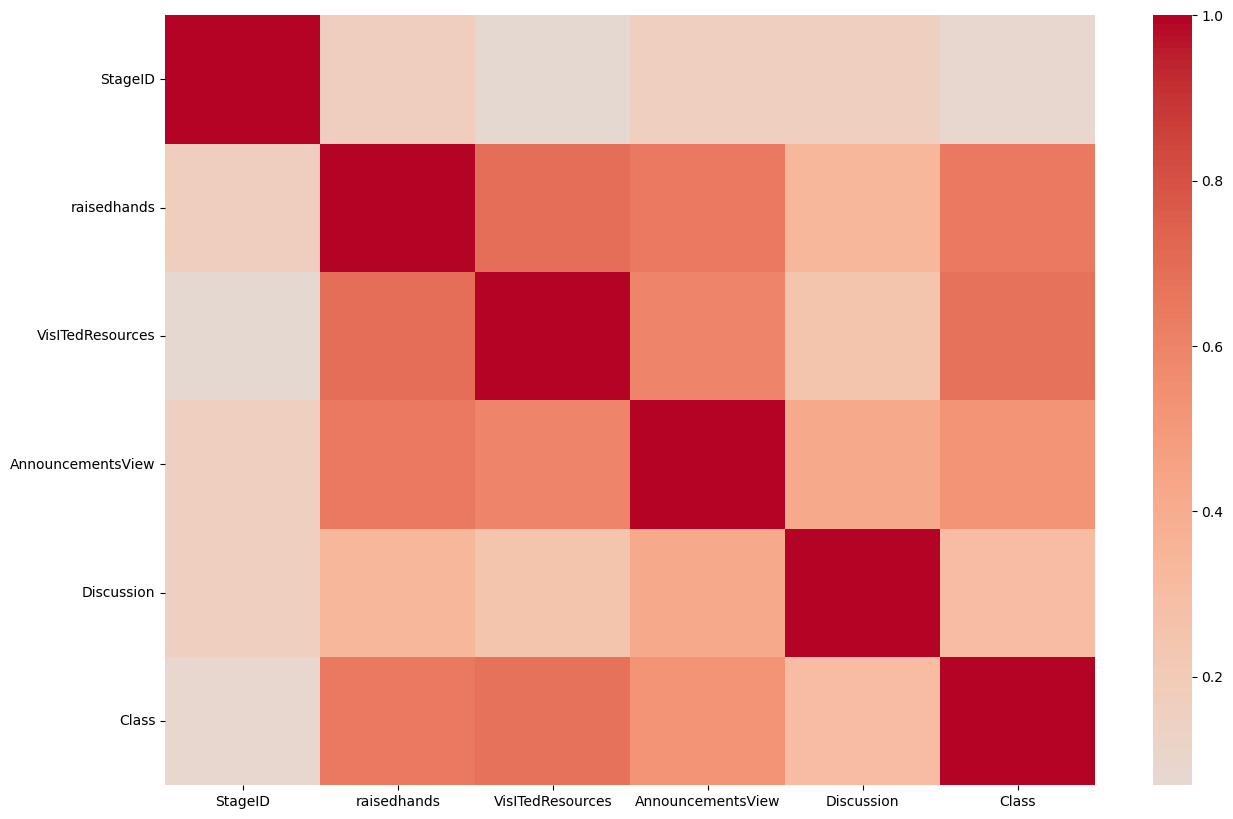

In [22]:
sns.heatmap(df.corr(), cmap="coolwarm", center=0.0)

From the heatmap, we notice a common trend. For example, the heatmap demonstrates correlations between a student's grade and class participation.

## Logistic Regression

The purpose of logistic regression is to estimate the relationship between one or more independent variable.

Therefore, if the logistic regression associated with our data has a decently high accuracy, it can further support correlation between the researched variables.

In [29]:
model = LogisticRegression()

In [33]:
predictors = ['raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion']
target = 'Class'

In [35]:
X = df[predictors]
y = df[target]

In [36]:
model.fit(X, y)

LogisticRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
model.coef_, model.intercept_

(array([[ 0.02220693,  0.02849922,  0.00776341,  0.01050733],
        [-0.02509767, -0.03041573, -0.01751949, -0.01302111],
        [ 0.00289074,  0.00191651,  0.00975608,  0.00251378]]),
 array([-3.41197781,  3.14128328,  0.27069454]))

In [41]:
weights = {predictors[i]:model.coef_ for i in range(len(predictors))}
weights['intercept'] = model.intercept_


In [42]:
ypred = model.predict(X)

In [43]:
accuracy_score(y, ypred)

0.625

In [46]:
from my_tools import make_conmat

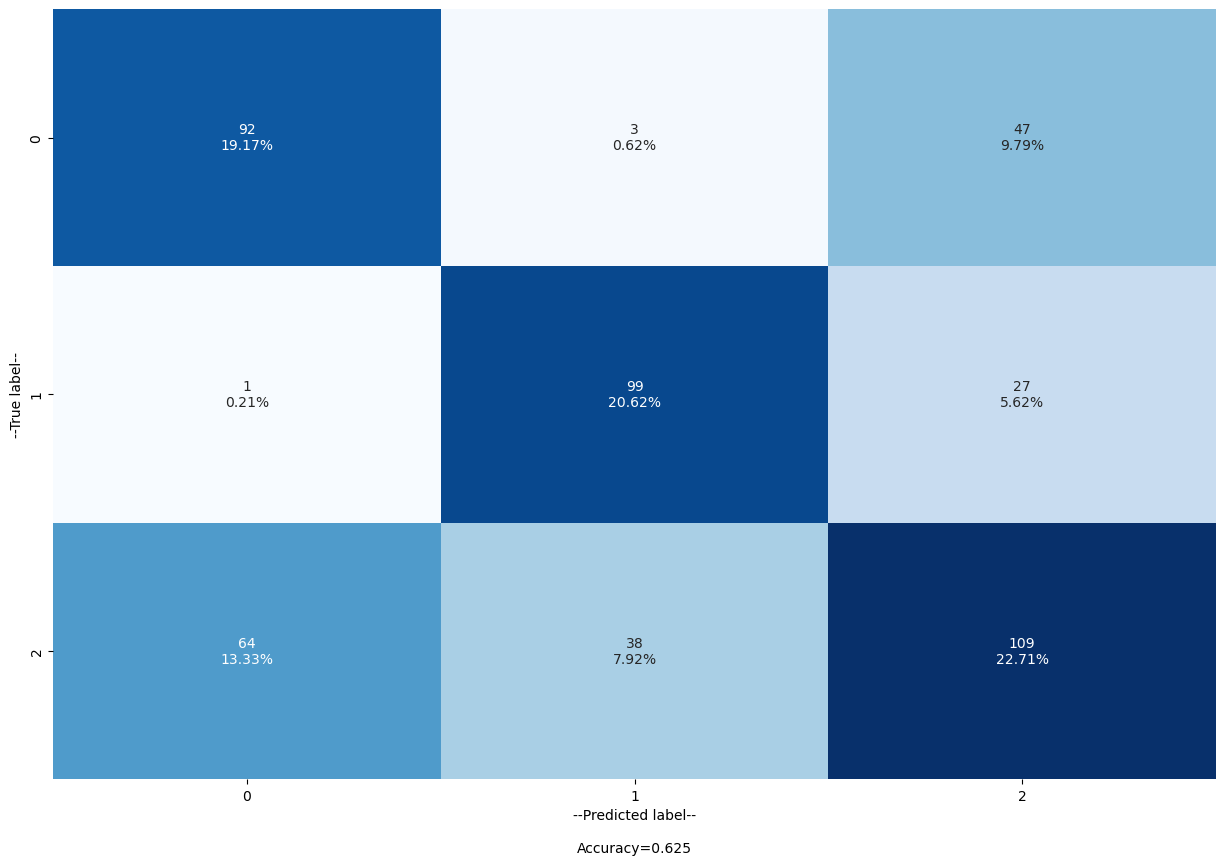

In [47]:
make_conmat(y, ypred)

Based on the accuracy of the confusion matrix (0.625), there does exist a trend in which student performance is affected by the prevalent factors.

## Conclusion

In conclusion, based on the data analyzed previously, there seems to be  key factors in achieving high grades in any subject. The common factor is the commitment and effort from the student in particpating in discussions, raising hands for possible clarifications, accessing school resources, et cetera. For instance, in the stacked bar chart and the pie chart from the 480 students that were tested in this data, 60.2% had an amount of under 7 absences, in comparison, to 39.8% of students who had above 7 absences. Therefore, students who had lower absences were most likely to have **Middle-Level** (scores from 70 to 89) or **High-Level** (scores from 90-100) rather than a **Low-Level** (scores from 0 to 69). In addition, in the *pair plot* and *heat map* shows that there is a string postive correlation by being participative and high grade scores. The range of correlation on partcipation to grade levels is between 52% to 68% approximately.


Furthermore, based on the confusion matrix there is a strong positive correlation on student performance and class participation. The accuracy of the confusion matrix is 62.5% which supports that there is correlation on being active in the class and high grade scores. Something to note is that the data has a low number of participants which connotes that the data given is less accurate than a sample with more variability and greater amount of participants.  

## Works Cited

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.